In [16]:
import pyautogui as pyg
import glob
import matplotlib.pyplot as plt
import numpy as np
import cv2
import time
import math

In [17]:
obstacles = []
masks=[]
kernel = np.ones((3,3),np.uint8)
for image in glob.glob("dino/*.jpg"):
    obstacles.append(cv2.imread(image,1))
    img = cv2.cvtColor(cv2.imread(image), cv2.COLOR_BGR2GRAY)
    thresh, mask = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)
    mask = cv2.dilate(mask,kernel,iterations = 1)
    mask = cv2.erode(mask,kernel,iterations =1)
    obstacles.append(mask)

In [18]:
rows = np.ceil(len(obstacles)/3)
plt.figure(figsize=[7,7])    
for index, obstacle in enumerate(obstacles,1):
    plt.subplot(rows,3,index);plt.imshow(obstacle,cmap='gray');
    plt.title("Obstacle: {}".format(index));plt.axis('off')  

<Figure size 504x504 with 0 Axes>

In [19]:
def distance(a1,b1,a2,b2):
    dist = math.sqrt((a2 - a1)**2 + (b2 - b1)**2)
    return dist



def find_dino():
    while True:         
        image = pyg.screenshot()
        # Convert PIL image to numpy format and also RGB to BGR
        img = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
        dino_location =  pyg.locateOnScreen('dino.jpg' , confidence=0.85)
        if dino_location is not None:
            # we will get the right corner x location of the bounding box of our dinosour
            return dino_location[0], dino_location[1], dino_location[2], dino_location[3]

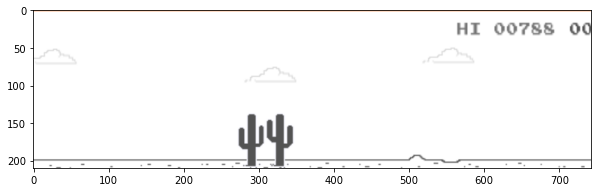

In [20]:
initial_x, initial_y, width, height = find_dino()

y1 = initial_y - 2 * height 
y2 = initial_y + height
x1 = initial_x - width
x2 = initial_x + 13 * width

image = pyg.screenshot()
img = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

estimated_roi = img[y1:y2, x1+125:x2]  

plt.figure(figsize=[10,10])    
plt.imshow(estimated_roi);

In [31]:
initial_x, initial_y, width, height = find_dino()

y1 = initial_y - 2 * height 
y2 = initial_y + height
x1 = initial_x - width
x2 = initial_x + 13 * width

image = pyg.screenshot()
img = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

estimated_roi = img[y1:y2, x1+125:x2]
loc=[]


while True:
 
    image = pyg.screenshot()
    img = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
    
    estimated_roi = img[y1:y2, x1+125:x2].copy()
    edges = cv2.Canny(estimated_roi,50,200)
    contours, hierarchy = cv2.findContours(edges,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
#     cv2.drawContours(img, contours, -1 , (0,255,0), 3) 
#     cnt= contours[0]
    for cnt in contours:
        left = tuple(cnt[cnt[:,:,0].argmin()][0])
        a,b=left
        print(left)
        dist=int(distance(x1+125,y1,a,b))
        print(dist)
        lst=loc.append(dist)
        print(loc)
    m=min(dist)
    if m<256:
        pyg.press('up')
# k = cv2.waitKey(1)
# if k == 27:   
#     break
    
        
        

(637, 209)
56
[56]
(452, 209)
149
[56, 149]
(317, 209)
281
[56, 149, 281]
(614, 208)
42
[56, 149, 281, 42]
(503, 209)
100
[56, 149, 281, 42, 100]
(431, 209)
169
[56, 149, 281, 42, 100, 169]
(413, 208)
186
[56, 149, 281, 42, 100, 169, 186]
(173, 208)
424
[56, 149, 281, 42, 100, 169, 186, 424]
(155, 209)
442
[56, 149, 281, 42, 100, 169, 186, 424, 442]
(34, 209)
563
[56, 149, 281, 42, 100, 169, 186, 424, 442, 563]
(713, 207)
122
[56, 149, 281, 42, 100, 169, 186, 424, 442, 563, 122]
(698, 207)
108
[56, 149, 281, 42, 100, 169, 186, 424, 442, 563, 122, 108]
(637, 207)
55
[56, 149, 281, 42, 100, 169, 186, 424, 442, 563, 122, 108, 55]
(566, 207)
47
[56, 149, 281, 42, 100, 169, 186, 424, 442, 563, 122, 108, 55, 47]
(536, 207)
70
[56, 149, 281, 42, 100, 169, 186, 424, 442, 563, 122, 108, 55, 47, 70]
(492, 207)
110
[56, 149, 281, 42, 100, 169, 186, 424, 442, 563, 122, 108, 55, 47, 70, 110]
(389, 207)
210
[56, 149, 281, 42, 100, 169, 186, 424, 442, 563, 122, 108, 55, 47, 70, 110, 210]
(227, 207)
3

TypeError: 'int' object is not iterable

p


error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-u4kjpz2z\opencv\modules\imgproc\src\templmatch.cpp:1164: error: (-215:Assertion failed) (depth == CV_8U || depth == CV_32F) && type == _templ.type() && _img.dims() <= 2 in function 'cv::matchTemplate'
